# Import
We start by importing the libraries we will be using later on.

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, IBMQ, execute, Aer, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options


# Create circuit blocks
The next code is me Building the circuits code
- qcc -> quantum carry circuit
- qcci -> quantum carry inversed circuit
- qcs -> quantum sum circuit

The blocks are developed respectivelay

In [2]:
qrc = QuantumRegister(4, 'q')
qcc = QuantumCircuit(qrc)

qrci = QuantumRegister(4, 'q')
qcci = QuantumCircuit(qrci)

qrs = QuantumRegister(3, 'q')
qcs = QuantumCircuit(qrs)

qcc.ccx(qrc[1], qrc[2], qrc[3])
qcc.cx (qrc[1], qrc[2])
qcc.ccx(qrc[0], qrc[2], qrc[3])

CB = qcc.to_instruction()


qcci.ccx(qrci[0], qrci[2], qrci[3])
qcci.cx (qrci[1], qrci[2])
qcci.ccx(qrci[1], qrci[2], qrci[3])

CIB = qcci.to_instruction()

qcs.cx (qrs[0], qrs[2])
qcs.cx (qrs[1], qrs[2])

SB = qcs.to_instruction()

- This function creates a desired n_bits circuit

In [3]:
def create_adder_circuit(n, a_values, b_values):
    

    qra = QuantumRegister( (n * 3) + 1, 'q')
    qca = QuantumCircuit(qra)

    # Take user input for bits of A
    
    a_counter = 1
    for bit in a_values[::-1]:
        if bit == '1':
            qca.x(qra[a_counter])
        a_counter += 3

    # Take user input for bits of B
    
    b_counter = 2
    for bit in b_values[::-1]:
        if bit == '1':
            qca.x(qra[b_counter])
        b_counter += 3

    for i in range(n):
        qca.append(CB, [qra[i * 3], qra[(i * 3) + 1], qra[(i * 3) + 2], qra[(i * 3) + 3]])
    qca.cx(qra[(n*3) - 2], qra[(n*3) - 1])
    qca.append(SB, [qra[(n - 1) * 3], qra[((n - 1) * 3) + 1], qra[((n - 1) * 3) + 2]])
    for i in range(n - 2, -1, -1):
        qca.append(CIB, [qra[(i * 3)], qra[(i * 3) + 1], qra[(i * 3) + 2], qra[(i * 3) + 3]])
        qca.append(SB, [qra[(i * 3)], qra[(i * 3) + 1], qra[(i * 3) + 2]])

    # Define classical register for measurement
    result = ClassicalRegister(n + 1, 'result')

    # Add the classical register to the quantum circuit
    qca.add_register(result)

    # Measure the SUM output qubits
    for i in range(n):
        qca.measure(qra[( i * 3) + 2], result[i])
    qca.measure(qra[(n * 3)], result[n])

    return qca

Create the circuit with desired n_bits

Enter the number of bits:  4
Enter the 4 bits for A:  1011
Enter the 4 bits for B:  0010


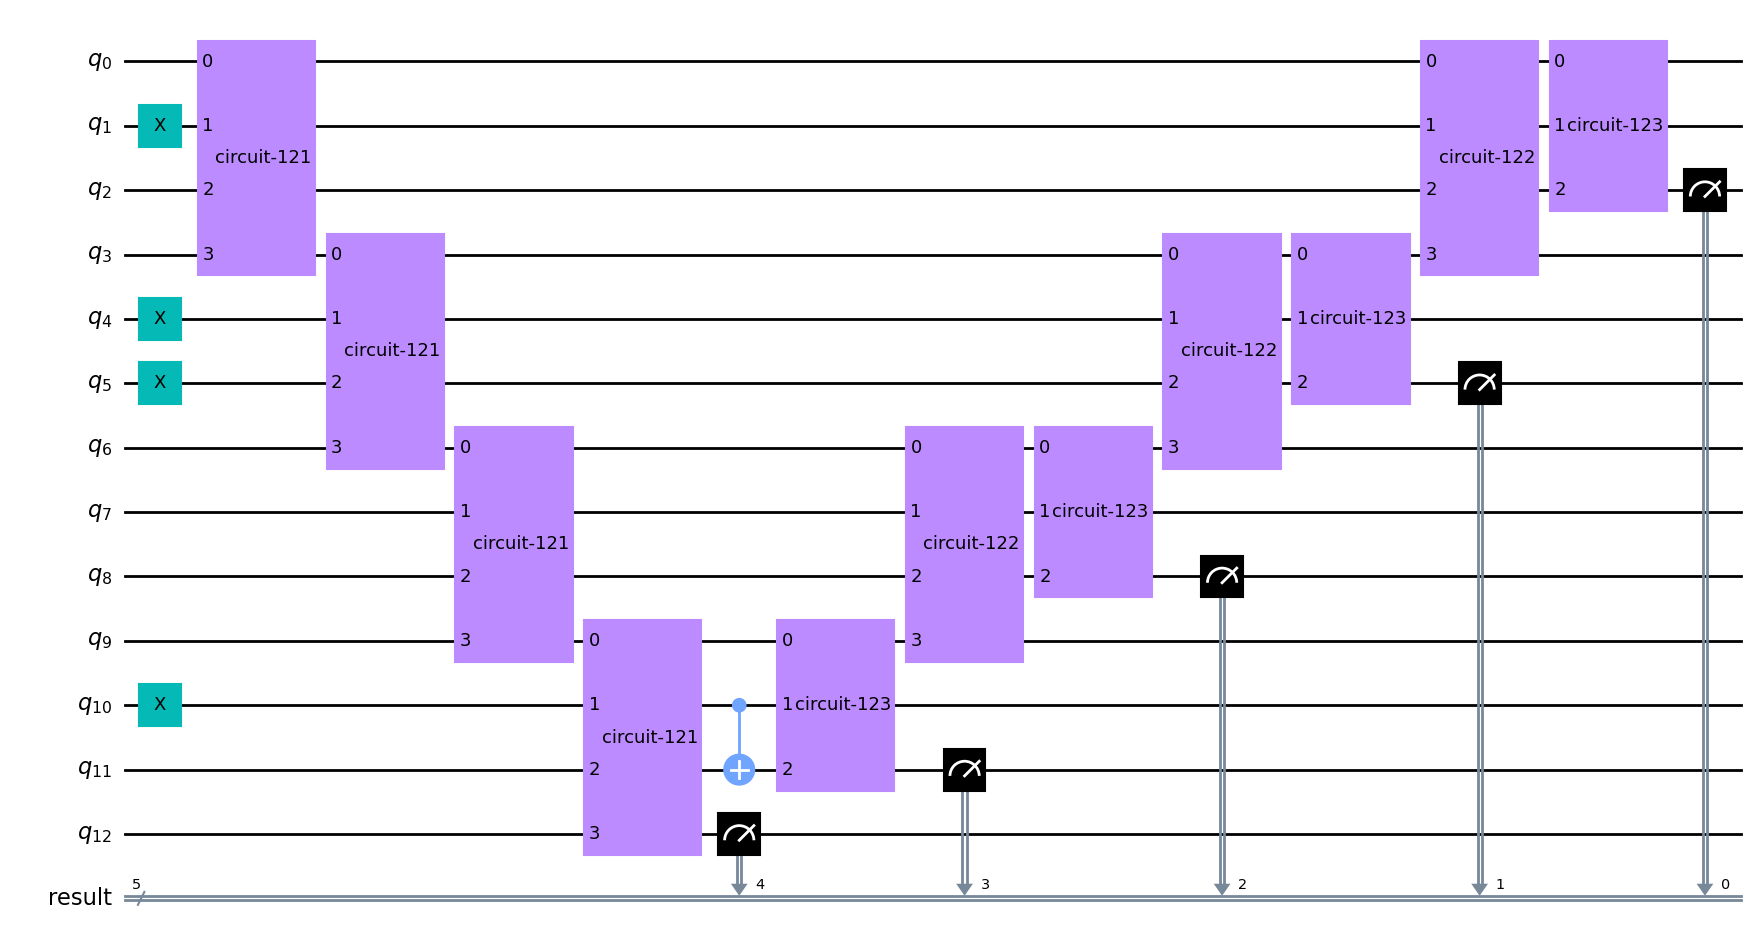

In [4]:
n_bits = int(input("Enter the number of bits: "))
a_values = input(f"Enter the {n_bits} bits for A: ")
b_values = input(f"Enter the {n_bits} bits for B: ")

circuit = create_adder_circuit(n_bits,a_values,b_values)
circuit.draw()

Test it on ``` qasm_simulator ```

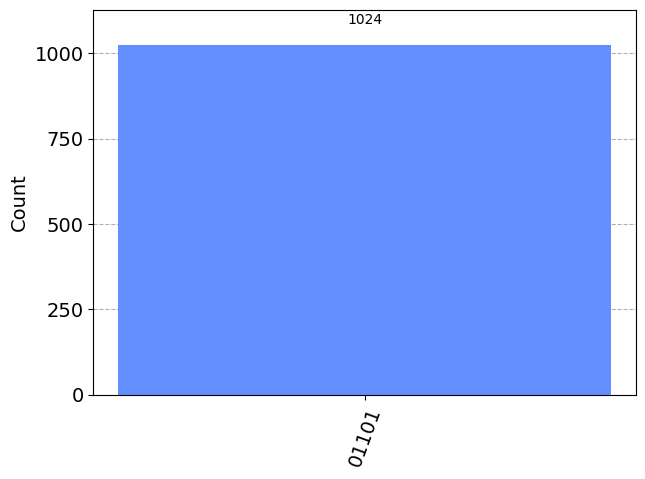

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)